## Testing ECMWF 9-Point Wind Grid System

Comparing the 9-grid system derived from the ECMWF data to the original NCEP grid. Using 2015 as a data subset.

In [1]:
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
import numpy as np
import pandas as pd
import calendar

data_path = Path.home()/'OneDrive'/'Kirstin'/'Uni'/'Year4'/'MSciProject'/'data_files'/'meteorological_data'

#### Extracting Data

In [2]:
ecmwf_ds = xr.open_mfdataset((data_path/'ECMWF'/'MHD'/'10m_wind_grid').glob('*2015.nc'))

ncep_ds = xr.open_mfdataset((data_path/'NCEP'/"wind_9points").glob("*2015.nc")).sel(dict(site='MHD', level=10))

# checking latitude and longitude are the same for both datasets
tolerance = 1e-3
for n in range(0,8):
    ecmwf_latitude = ecmwf_ds['latitude'].values[n]
    ncep_latitude = ncep_ds['lat'].values[n]

    ecmwf_longitude = ecmwf_ds['longitude'].values[n] + 360
    ncep_longitude = ncep_ds['lon'].values[n]

    assert np.abs(ecmwf_latitude - ncep_latitude) <= tolerance, f"Points {n} are not almost equal. {ncep_latitude} != {ecmwf_latitude}"
    assert np.abs(ecmwf_longitude - ncep_longitude) <= tolerance, f"Points {n} are not almost equal. {ncep_longitude} != {ecmwf_longitude}"

c:\Users\kirst\OneDrive\Kirstin\Uni\Year4\MSciProject\my_code\optimising_algorithm\venv\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [3]:
ecmwf_u = ecmwf_ds['u10']
ecmwf_v = ecmwf_ds['v10']

ncep_u = ncep_ds['uwnd']
ncep_v = ncep_ds['vwnd']

In [4]:
ecmwf_wind_speed = np.sqrt(ecmwf_u**2 + ecmwf_v**2)
ecmwf_wind_direction = (np.arctan2(ecmwf_u, ecmwf_v) * 180 / np.pi) + 180

ncep_wind_speed = np.sqrt(ncep_u**2 + ncep_v**2)
ncep_wind_direction = (np.arctan2(ncep_u, ncep_v) * 180 / np.pi) + 180

#### Windrose

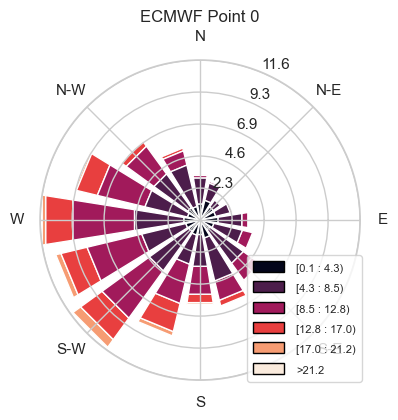

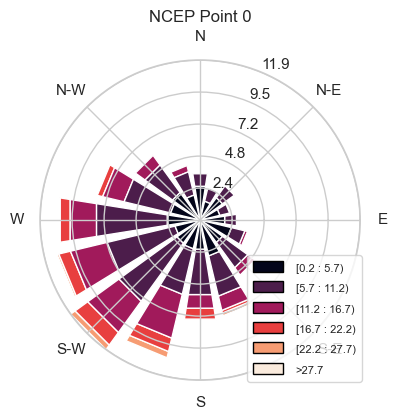

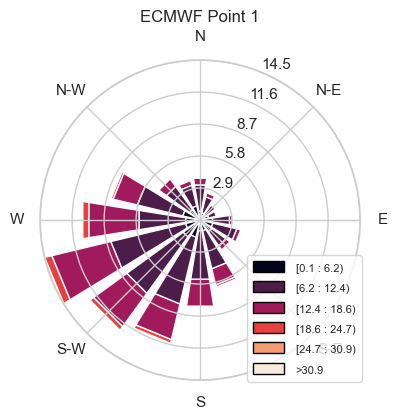

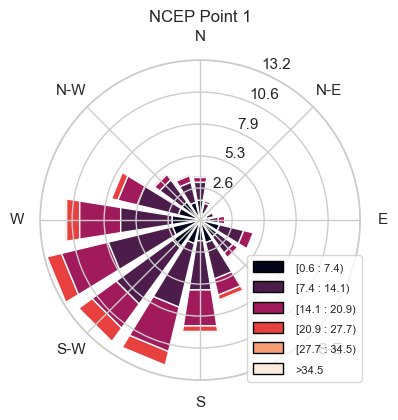

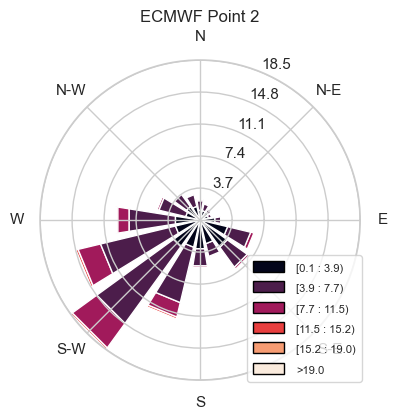

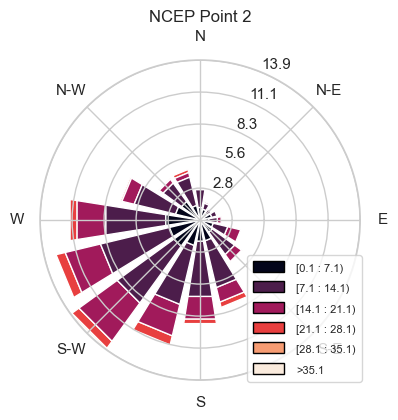

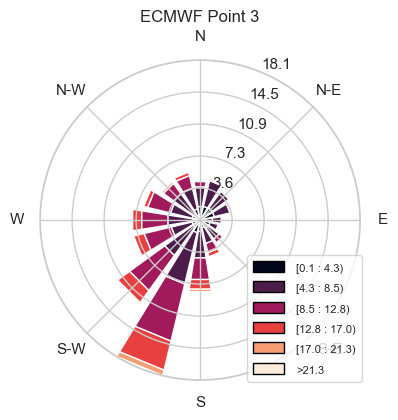

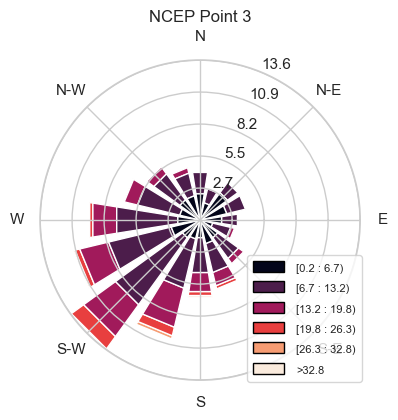

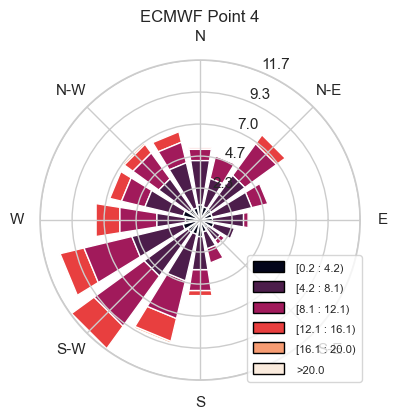

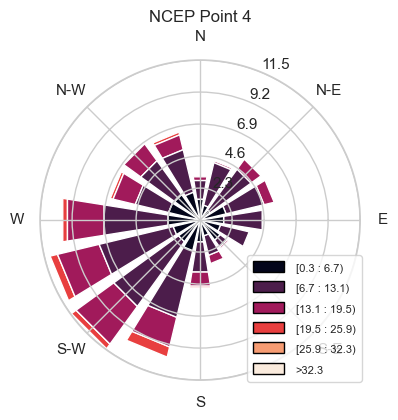

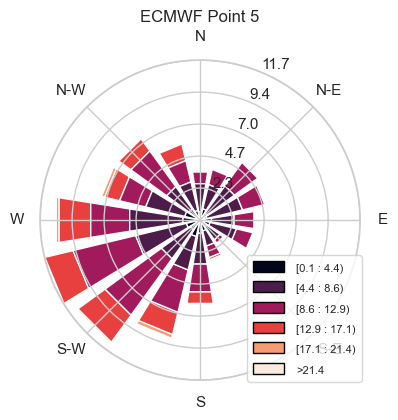

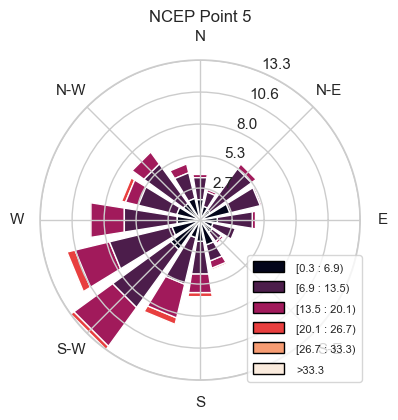

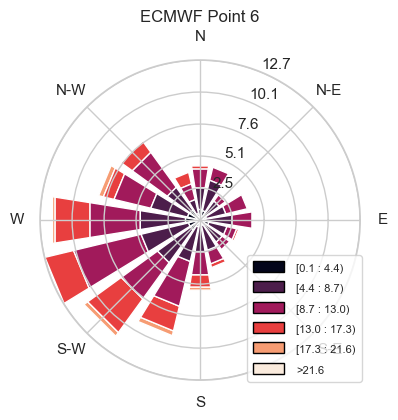

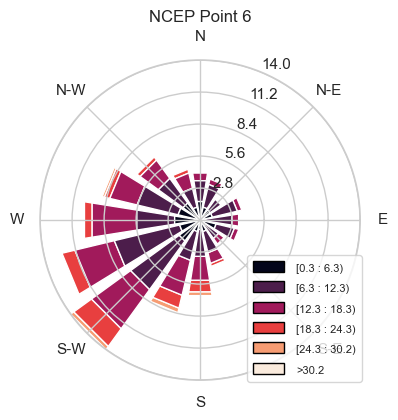

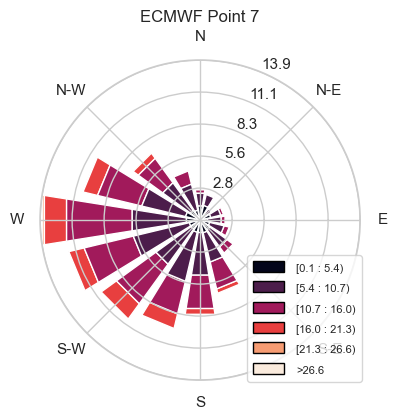

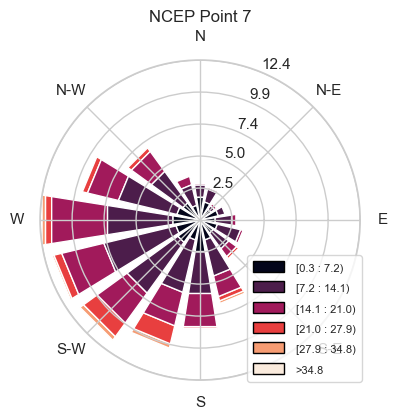

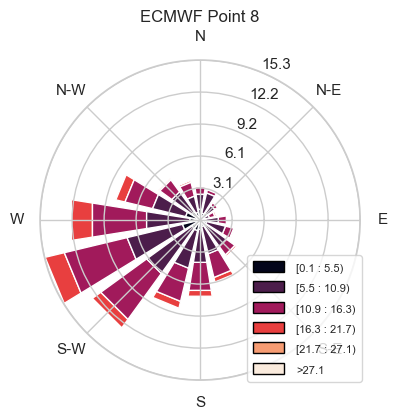

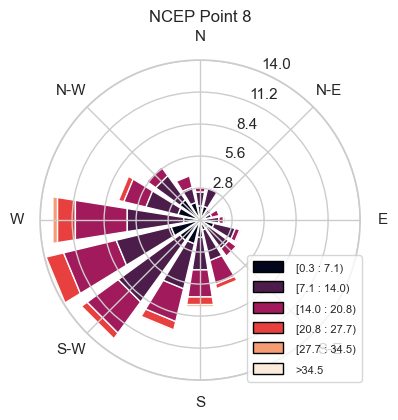

In [8]:
for n in range(ecmwf_wind_speed.shape[1]):
    ecmwf_wind_speed_row = ecmwf_wind_speed[:,n]
    ecmwf_wind_direction_row = ecmwf_wind_direction[:,n]

    fig = plt.figure(figsize=(8,4))
    sns.set(style="whitegrid")
    ax = WindroseAxes.from_ax(fig=fig)
    ax.bar(ecmwf_wind_direction_row, ecmwf_wind_speed_row, normed=True, opening=0.8, edgecolor='white')
    ax.set_legend(loc=4)
    ax.set_title(f"ECMWF Point {n:.0f}")


    ncep_wind_speed_row = ncep_wind_speed[:,n]
    ncep_wind_direction_row = ncep_wind_direction[:,n]

    fig = plt.figure(figsize=(8,4))
    sns.set(style="whitegrid")
    ax = WindroseAxes.from_ax(fig=fig)
    ax.bar(ncep_wind_direction_row, ncep_wind_speed_row, normed=True, opening=0.8, edgecolor='white')
    ax.set_legend(loc=4)
    ax.set_title(f"NCEP Point {n:.0f}")

#### Monthly Averages - Wind Speed

Text(0.5, 1.01, 'Comparing Monthly Averaged Wind Speeds at 9 Grid Points')

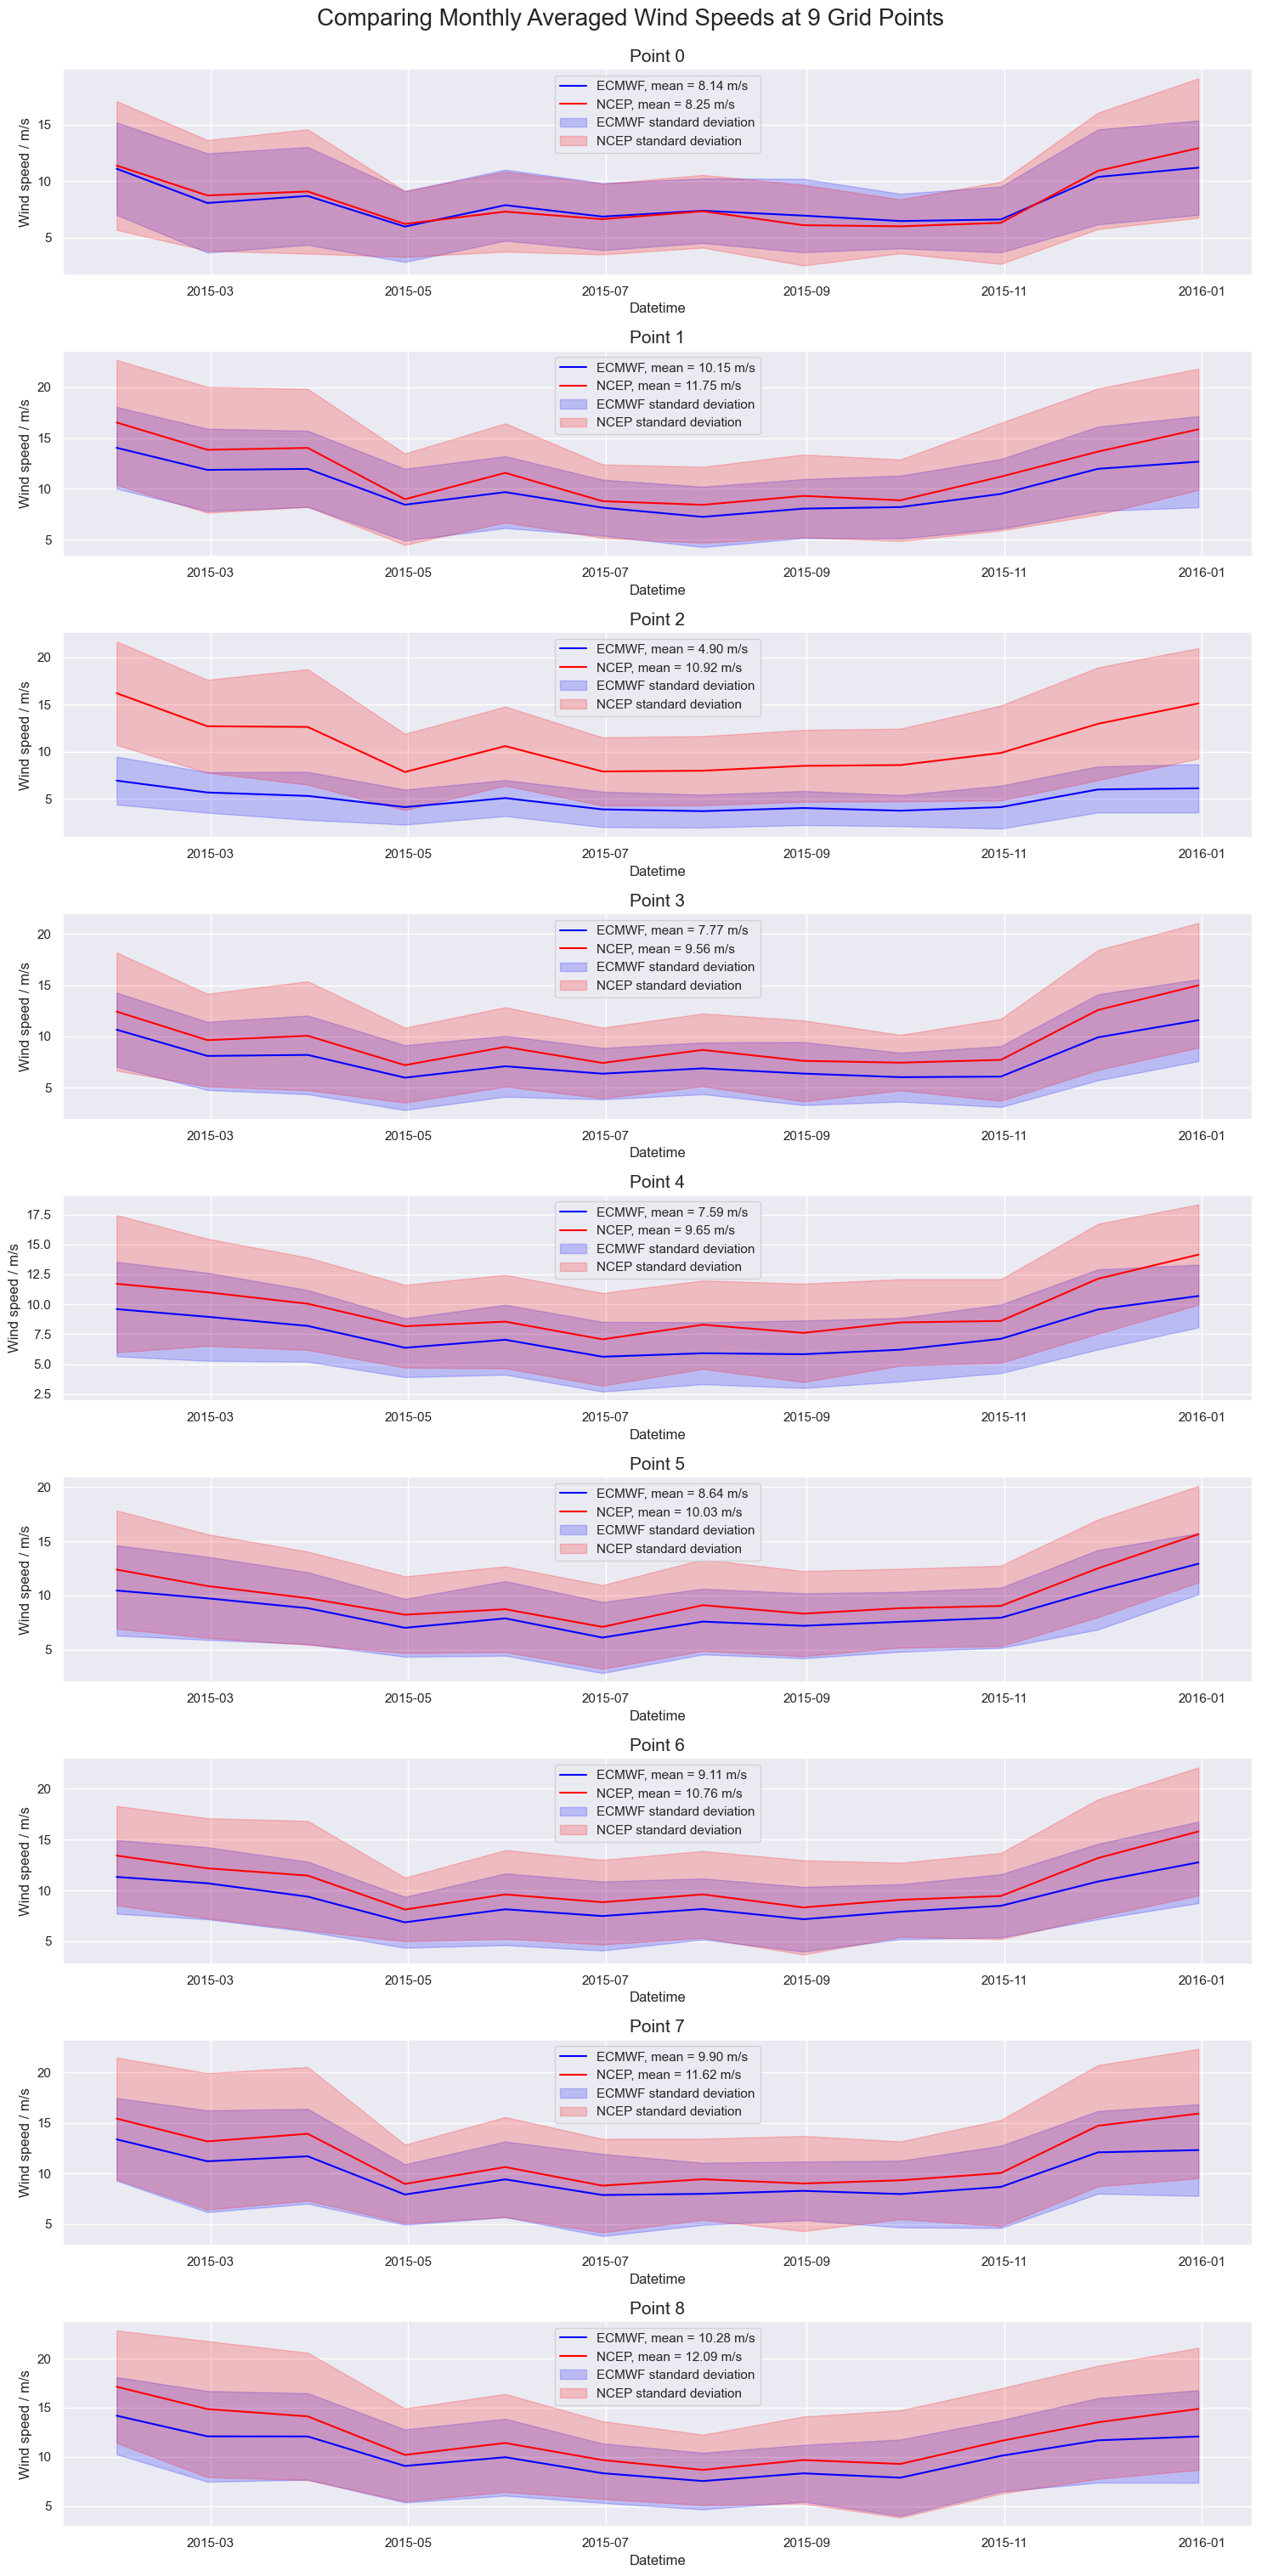

In [74]:
ecmwf_monthly = ecmwf_wind_speed.resample(time='M').mean()
ncep_monthly = ncep_wind_speed.resample(time='M').mean()

ecmwf_std = ecmwf_wind_speed.resample(time='M').std()
ncep_std = ncep_wind_speed.resample(time='M').std()

fig, axs = plt.subplots(9, figsize=(15,30))
sns.set(style="darkgrid")

for n in range(ecmwf_wind_speed.shape[1]):   
    ecmwf_wind_speed_row = ecmwf_monthly[:,n]
    ncep_wind_speed_row = ncep_monthly[:,n]

    ecmwf_row_std = ecmwf_std[:,n]
    ncep_row_std = ncep_std[:,n]

    axs[n].plot(ecmwf_monthly.indexes['time'], ecmwf_wind_speed_row,
                label=f'ECMWF, mean = {ecmwf_wind_speed_row.values.mean():.2f} m/s', color='blue')

    axs[n].plot(ncep_monthly.indexes['time'], ncep_wind_speed_row,
                label=f'NCEP, mean = {ncep_wind_speed_row.values.mean():.2f} m/s', color='red')
    

    # adding standard deviation shading
    upper_ecmwf = ecmwf_wind_speed_row.values + ecmwf_row_std.values
    lower_ecmwf = ecmwf_wind_speed_row.values - ecmwf_row_std.values

    upper_ncep = ncep_wind_speed_row.values + ncep_row_std.values
    lower_ncep = ncep_wind_speed_row.values - ncep_row_std.values

    axs[n].fill_between(ecmwf_monthly.indexes['time'], lower_ecmwf, upper_ecmwf, color='blue', alpha=0.2, label="ECMWF standard deviation")
    axs[n].fill_between(ncep_monthly.indexes['time'], lower_ncep, upper_ncep, color='red', alpha=0.2, label="NCEP standard deviation")


    axs[n].set_title(f"Point {n:.0f}", fontsize=15)
    axs[n].set_xlabel("Datetime")
    axs[n].set_ylabel("Wind speed / m/s")
    axs[n].legend(loc='upper center')

fig.tight_layout()
fig.suptitle("Comparing Monthly Averaged Wind Speeds at 9 Grid Points", fontsize=20, y=1.01)

#### Monthly Averages - Wind Direction

Text(0.5, 1.01, 'Comparing Monthly Averaged Wind Directions at 9 Grid Points')

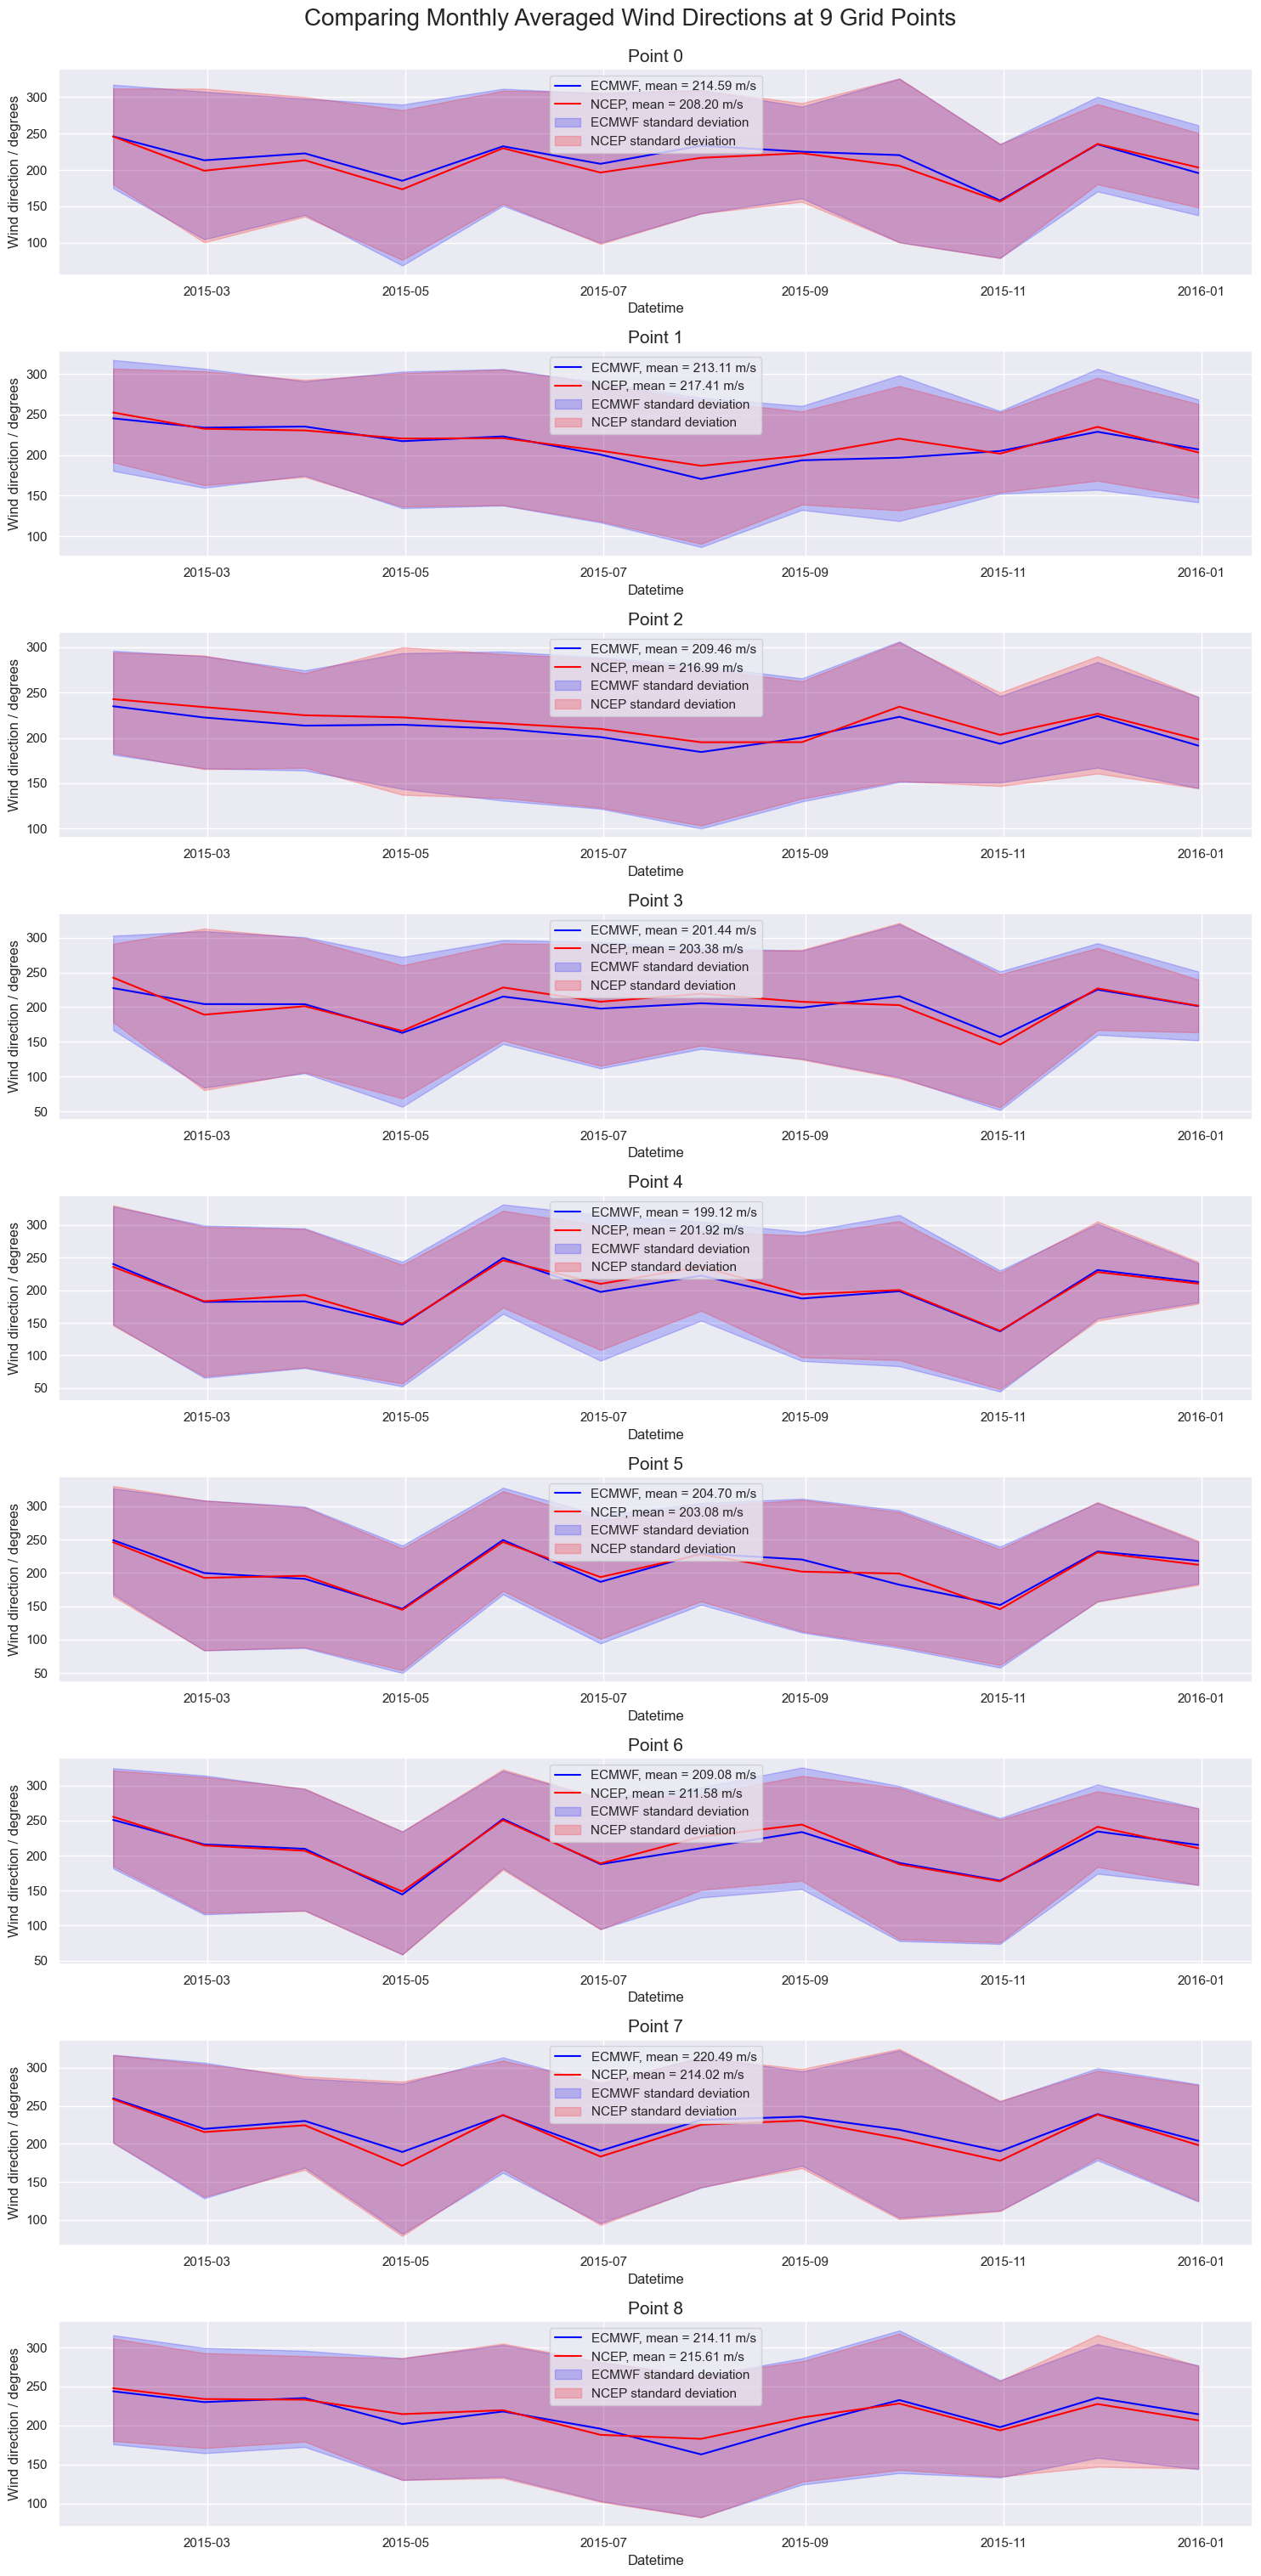

In [79]:
ecmwf_monthly = ecmwf_wind_direction.resample(time='M').mean()
ncep_monthly = ncep_wind_direction.resample(time='M').mean()

ecmwf_std = ecmwf_wind_direction.resample(time='M').std()
ncep_std = ncep_wind_direction.resample(time='M').std()

fig, axs = plt.subplots(9, figsize=(15,30))
sns.set(style="darkgrid")

for n in range(ecmwf_monthly.shape[1]):
    ecmwf_wind_direction_row = ecmwf_monthly[:,n]
    ncep_wind_direction_row = ncep_monthly[:,n]

    ecmwf_row_std = ecmwf_std[:,n]
    ncep_row_std = ncep_std[:,n]

    axs[n].plot(ecmwf_monthly.indexes['time'], ecmwf_wind_direction_row,
                label=f'ECMWF, mean = {ecmwf_wind_direction_row.values.mean():.2f} m/s', color='blue')

    axs[n].plot(ncep_monthly.indexes['time'], ncep_wind_direction_row,
                label=f'NCEP, mean = {ncep_wind_direction_row.values.mean():.2f} m/s', color='red')
    

    upper_ecmwf = ecmwf_wind_direction_row.values + ecmwf_row_std.values
    lower_ecmwf = ncep_wind_direction_row.values - ecmwf_row_std.values

    upper_ncep = ecmwf_wind_direction_row.values + ncep_row_std.values
    lower_ncep = ncep_wind_direction_row.values - ncep_row_std.values

    axs[n].fill_between(ecmwf_monthly.indexes['time'], lower_ecmwf, upper_ecmwf, color='blue', alpha=0.2, label="ECMWF standard deviation")
    axs[n].fill_between(ncep_monthly.indexes['time'], lower_ncep, upper_ncep, color='red', alpha=0.2, label="NCEP standard deviation")
    
    
    axs[n].set_title(f"Point {n:.0f}", fontsize=15)
    axs[n].set_xlabel("Datetime")
    axs[n].set_ylabel("Wind direction / degrees")
    axs[n].legend(loc='upper center')

fig.tight_layout()
fig.suptitle("Comparing Monthly Averaged Wind Directions at 9 Grid Points", fontsize=20, y=1.01)

#### Comparing Point Averages

Text(0.5, 1.02, 'Comparing Mean Wind Speeds and Directions at 9 Grid Points for 2015')

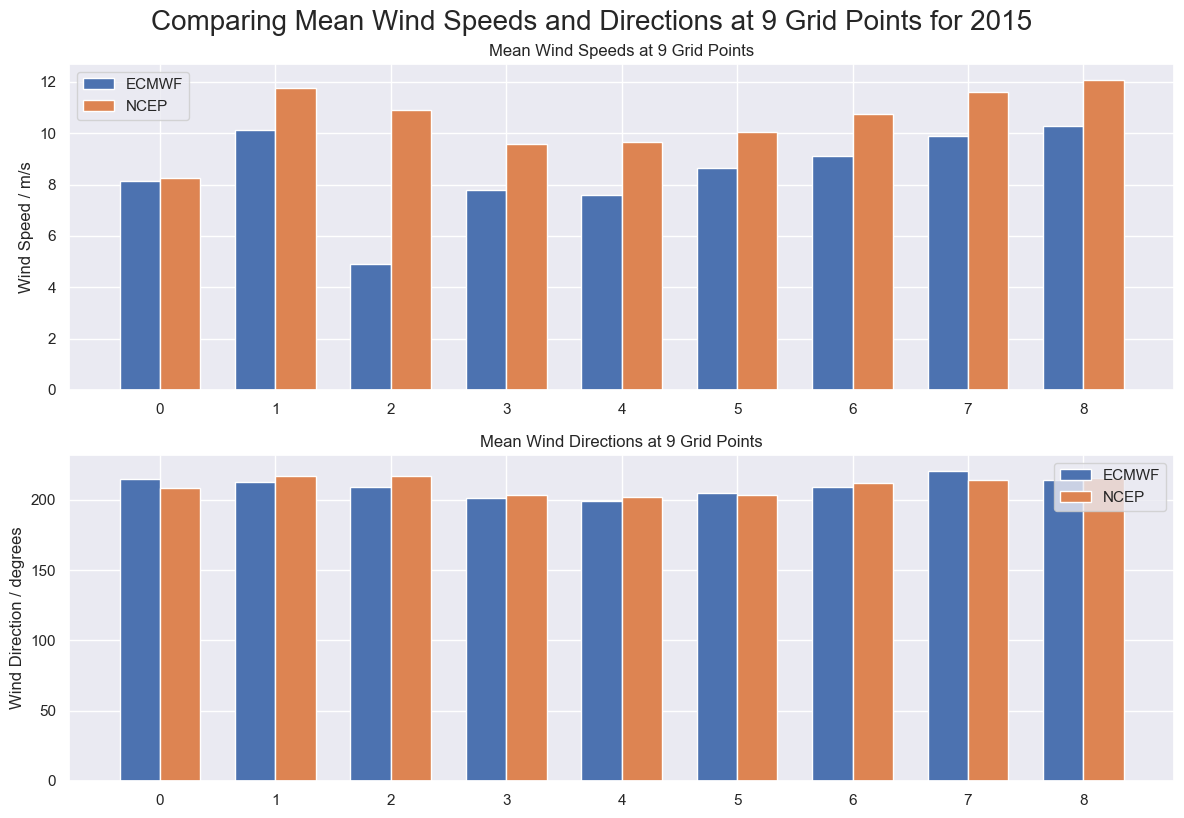

In [55]:
ecmwf_wind_means = []
ncep_wind_means = []
ncep_direction_means = []
ecmwf_direction_means = []
points = np.linspace(0,8,9)

for n in range(9):
    ecmwf_wind_speed_row = ecmwf_wind_speed[:,n]
    ecmwf_wind_direction_row = ecmwf_wind_direction[:,n]
    ncep_wind_speed_row = ncep_wind_speed[:,n]
    ncep_wind_direction_row = ncep_wind_direction[:,n]

    ecmwf_wind_means.append(ecmwf_wind_speed_row.values.mean())
    ecmwf_direction_means.append(ecmwf_wind_direction_row.values.mean())
    ncep_wind_means.append(ncep_wind_speed_row.values.mean())
    ncep_direction_means.append(ncep_wind_direction_row.values.mean())


fig, ax = plt.subplots(2,1, figsize=(12, 8))
sns.set(style="darkgrid")

bar_width = 0.35

bar1 = ax[0].bar(points - bar_width / 2, ecmwf_wind_means, bar_width, label='ECMWF')
bar2 = ax[0].bar(points + bar_width / 2, ncep_wind_means, bar_width, label='NCEP')

bar3 = ax[1].bar(points - bar_width / 2, ecmwf_direction_means, bar_width, label='ECMWF')
bar4 = ax[1].bar(points + bar_width / 2, ncep_direction_means, bar_width, label='NCEP')

ax[0].set_ylabel('Wind Speed / m/s')
ax[0].set_title('Mean Wind Speeds at 9 Grid Points', fontsize=12)
ax[0].set_xticks(points)
ax[0].set_xticklabels(map(int, points))
ax[0].legend()

ax[1].set_ylabel('Wind Direction / degrees')
ax[1].set_title('Mean Wind Directions at 9 Grid Points', fontsize=12)
ax[1].set_xticks(points)
ax[1].set_xticklabels(map(int, points))
ax[1].legend()

fig.tight_layout()
fig.suptitle("Comparing Mean Wind Speeds and Directions at 9 Grid Points for 2015", fontsize=20, y=1.02)